# Regression

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df_linear = df[['age', 'fare']]
df_linear.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [3]:
# Simple Linear Regression
X = df[['age']]
y = df['fare']

In [4]:
X

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [5]:
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [8]:
# checking percentage of missing values
X.isnull().sum() / len(X) * 100

age    19.86532
dtype: float64

In [9]:
y.isnull().sum() / len(y) * 100

0.0

In [10]:
# fill missing values
X['age'] = X['age'].fillna(X['age'].mean())

/tmp/ipykernel_31867/1762547022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())


In [11]:
# check missing values again
X.isnull().sum() / len(X) * 100

age    0.0
dtype: float64

In [12]:
# print shape of X and y
print(X.shape)
print(y.shape)

(891, 1)
(891,)


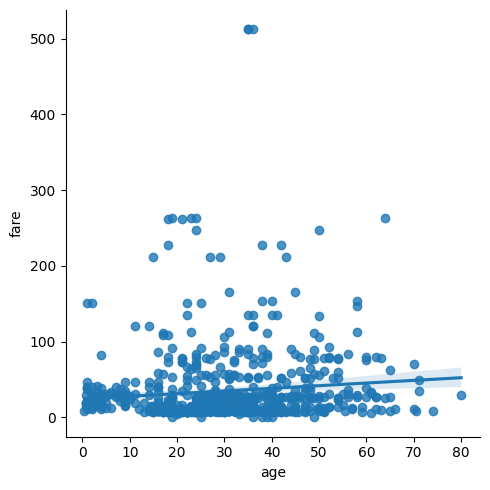

In [14]:
# plot df_linear
sns.lmplot(x='age', y='fare', data=df_linear)

<Axes: ylabel='age'>

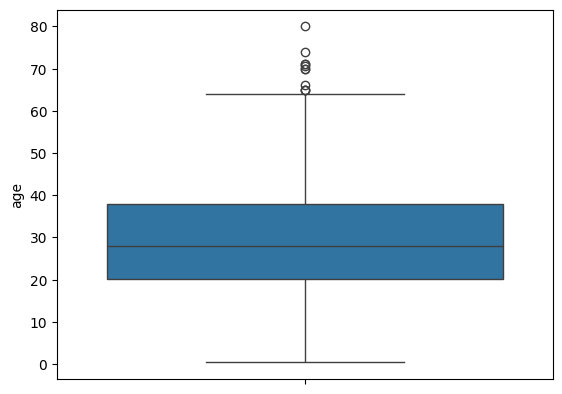

In [15]:
# create boxplot
sns.boxplot(y='age', data=df_linear)

In [16]:
# remove outliers
df_linear = df_linear[df_linear['age'] < 60]

<Axes: ylabel='age'>

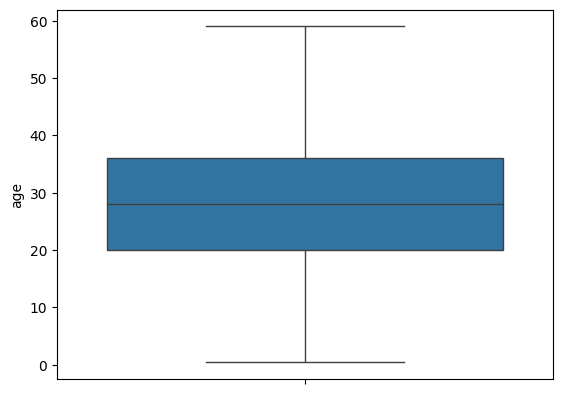

In [17]:
sns.boxplot(y='age', data=df_linear)

<Axes: ylabel='fare'>

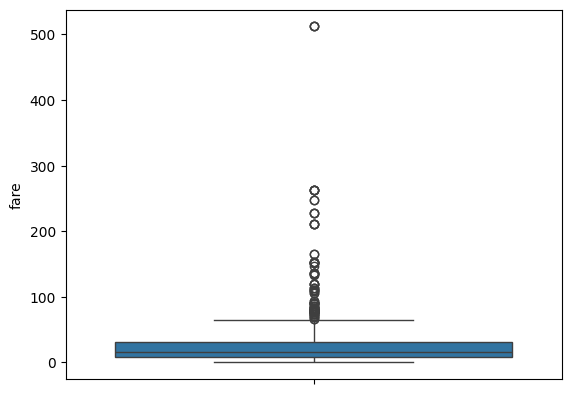

In [18]:
# boxplot for fare
sns.boxplot(y='fare', data=df_linear)

In [23]:
# remove outliers for fare
df_linear = df_linear[df_linear['fare'] < 50]

<Axes: ylabel='fare'>

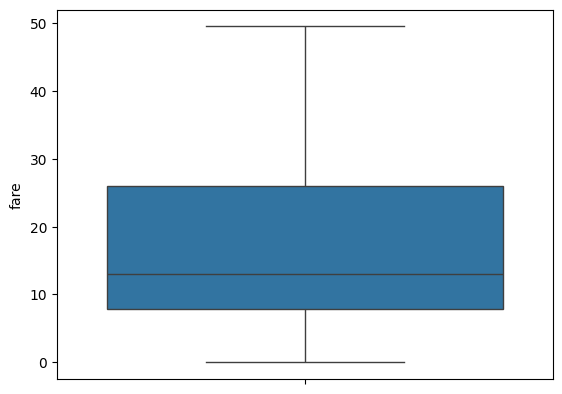

In [24]:
sns.boxplot(y='fare', data=df_linear)

In [25]:
df_linear.shape

(557, 2)

In [26]:
X = df_linear[['age']]
y = df_linear['fare']

In [27]:
X.isnull().sum() / len(X) * 100

age    0.0
dtype: float64

In [28]:
y.isnull().sum() / len(y) * 100

0.0

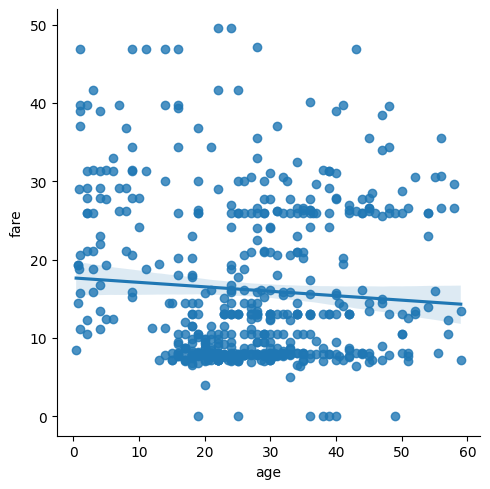

In [29]:
sns.lmplot(x='age', y='fare', data=df_linear)

In [30]:
# create object of linear regression
model = LinearRegression()

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.predict([[30]])

/home/idev/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.21471555])

In [32]:
# predict the model
y_pred = model.predict(X_test)

In [36]:
y_pred

array([14.0615063 , 16.14046696, 15.76922398, 17.25419588, 16.58595853,
       15.4722296 , 18.14517902, 16.21471555, 16.80870431, 16.58595853,
       15.99196977, 16.43746134, 16.73445572, 15.84347258, 16.02909406,
       17.03145009, 15.99196977, 16.58595853, 15.62072679, 14.72974366,
       17.10569869, 15.84347258, 17.03145009, 16.80870431, 15.02673803,
       15.5464782 , 15.10098663, 16.51170993, 16.36321274, 14.43274928,
       14.72974366, 17.10569869, 15.76922398, 16.14046696, 14.65549506,
       14.43274928, 16.06621836, 16.9572015 , 16.8829529 , 15.91772117,
       18.14517902, 15.91772117, 16.8829529 , 16.36321274, 17.17994728,
       16.14046696, 15.10098663, 15.76922398, 16.58595853, 16.58595853,
       15.76922398, 16.51170993, 18.29367621, 16.8829529 , 17.25419588,
       15.91772117, 17.10569869, 17.10569869, 15.5464782 , 15.32373241,
       16.51170993, 17.10569869, 16.06621836, 17.03145009, 16.80870431,
       17.03145009, 18.14517902, 18.38054706, 16.9572015 , 17.25

<Axes: xlabel='fare'>

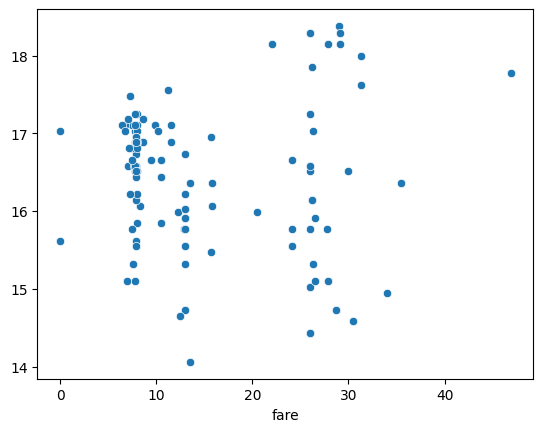

In [37]:
sns.scatterplot(x=y_test, y=y_pred)

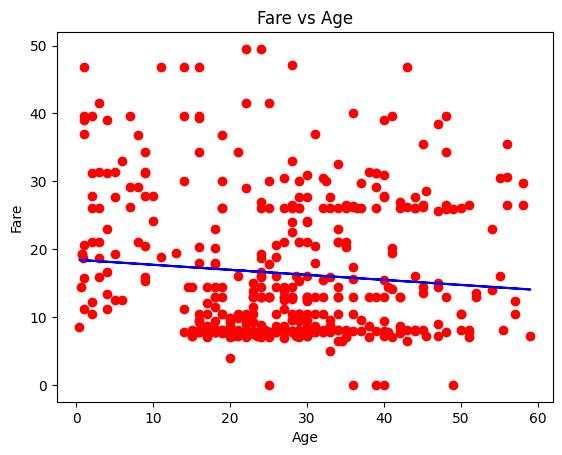

In [33]:
# plot the model
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [38]:
model.score(X_test, y_test)

-0.04207651282245917

## Model Evaluation Metrices

1. R2
2. MSE (Mean Squared Error)
3. MAE (Mean Absolute Error)
4. RMSE (Root Mean Square Error)

In [39]:
# import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [42]:
# calculate mean squared error, r2 score and mean absolute error
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
# RMSE = mean_squared_error(y_test, y_pred, squared=False)

print('Mean Squared Error:', MSE)
print('R2 Score:', R2)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)


Mean Squared Error: 88.63488417693796
R2 Score: -0.04207651282245917
Mean Absolute Error: 8.449816084335193
Root Mean Squared Error: 9.414610144713267
